In [197]:
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

In [198]:
#tridiagonal algorithm
def tridiagonal_algo(A, d):
    #matrix separation
    b = np.copy(np.diag(A))
    a = np.concatenate(([0], np.diagonal(A,-1))) #lower
    c = np.concatenate((np.diagonal(A,1), [0])) #upper
    n=len(d)
    x=np.zeros((n))
    #thomas algorithm
    #forward sweep:
    for i in range(1, n):
        w = a[i]/float(b[i-1])
        b[i] = b[i] - (w*c[i-1])
        d[i] = d[i] - (w*d[i-1])
    #back-substitution:
    x[n-1] = d[n-1]/b[n-1]
    for i in range(n-2, -1, -1):
        x[i] = (d[i] - c[i]*x[i+1])/b[i]
    return x

In [199]:
#exact solution function
def u(x,t,f):
    if 0<=x<t:
        return 0
    elif t<=x<=1:
        return f(x-t)

#initial condition functions
def f_1(x):
    if x<0.5:
        return 0.25 - np.abs(x-0.25)
    else:
        return 0
f_2 = lambda x:np.power(np.sin(np.pi*x),2)

#definition of numerical error on max norm
e = lambda v_k, u_kn:np.amax(np.abs(np.subtract(v_k, u_kn)))

In [200]:
'''
M = 64
'''

#data initialization
b = 1
M = 64
h = T = 1/M
n = M
r = b*T/(2*h)
#Ax = B
A = diags([-r, 1, r], [-1, 0, 1], shape=(int(n+1), int(n+1))).toarray()
#fill B with kh
B = np.linspace(0, 1, n+1)

In [201]:
'''
(i) initial condition data (f_1), the matrix pattern is Z[time][space], Z any 2D matrix
'''

V_mat = np.zeros((n+1,n+1)) #to save the overall result of v_k^n
f_1_vec = np.vectorize(f_1)
v = f_1_vec(B)
#v[0] = 0
v[M] = 0
V_mat[0] = v

#do tridiagonal algo for numerical solution
for i in range(n): 
    v = tridiagonal_algo(A, v)
    v[M] = 0
    V_mat[i+1] = v

#exact sol:
U = np.zeros((n+1, n+1))
for i in range(n+1):
    for k in range(n+1):
        U[i][k] = u(k*h, i*T, f_1)
        
#errors on max norm
e_range = int(M/2)+1
errs = np.zeros(e_range)
for i in range(e_range):
    errs[i] = e(V_mat[i, 1:M], U[i, 1:M])
print("M =",M,"; error at M/2 = ",errs[-1])

M = 64 ; error at M/2 =  0.06999966922216688


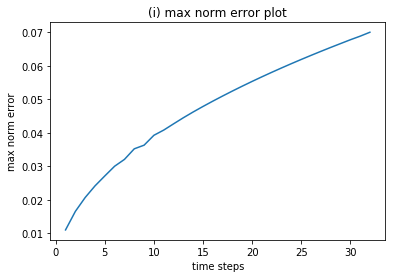

In [202]:
'''
plot max norm errors of f_1
'''
time_steps = np.linspace(1,int(M/2),int(M/2))
plt.title("(i) max norm error plot")
plt.xlabel("time steps")
plt.ylabel("max norm error")
plt.plot(time_steps, errs[1:])

In [203]:
'''
(ii) initial condition data (f_2), the matrix pattern is Z[time][space], Z any 2D matrix
'''

V_mat = np.zeros((n+1,n+1)) #to save the overall result of v_k^n
f_2_vec = np.vectorize(f_2)
v = f_2_vec(B)
#v[0] = 0
v[M] = 0
V_mat[0] = v

#do tridiagonal algo for numerical solution
for i in range(n): 
    v = tridiagonal_algo(A, v)
    v[M] = 0
    V_mat[i+1] = v

#exact sol:
U = np.zeros((n+1, n+1))
for i in range(n+1):
    for k in range(n+1):
        U[i][k] = u(k*h, i*T, f_2)
        
#errors on max norm
e_range = int(M/2)+1
errs = np.zeros(e_range)
for i in range(e_range):
    errs[i] = e(V_mat[i, 1:M], U[i, 1:M])
print("M =",M,"; error at M/2 = ",errs[-1])

M = 64 ; error at M/2 =  0.37410438515899813


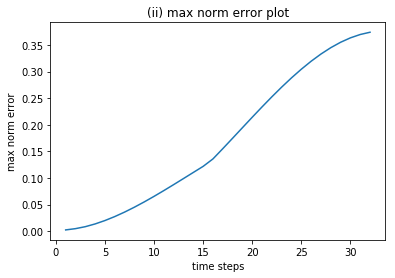

In [204]:
'''
plot max norm errors of f_2
'''
time_steps = np.linspace(1,int(M/2),int(M/2))
plt.title("(ii) max norm error plot")
plt.xlabel("time steps")
plt.ylabel("max norm error")
plt.plot(time_steps, errs[1:])

In [205]:
'''
M = 128
'''
#data initialization
b = 1
M = 128
h = T = 1/M
n = M
r = b*T/(2*h)
#Ax = B
A = diags([-r, 1, r], [-1, 0, 1], shape=(int(n+1), int(n+1))).toarray()
#fill B with kh
B = np.linspace(0, 1, n+1)

In [206]:
'''
(i) initial condition data (f_1), the matrix pattern is Z[time][space], Z any 2D matrix
'''

V_mat = np.zeros((n+1,n+1)) #to save the overall result of v_k^n
f_1_vec = np.vectorize(f_1)
v = f_1_vec(B)
#v[0] = 0
v[M] = 0
V_mat[0] = v

#do tridiagonal algo for numerical solution
for i in range(n): 
    v = tridiagonal_algo(A, v)
    v[M] = 0
    V_mat[i+1] = v

#exact sol:
U = np.zeros((n+1, n+1))
for i in range(n+1):
    for k in range(n+1):
        U[i][k] = u(k*h, i*T, f_1)
        
#errors on max norm
e_range = int(M/2)+1
errs = np.zeros(e_range)
for i in range(e_range):
    errs[i] = e(V_mat[i, 1:M], U[i, 1:M])
print("M =",M,"; error at M/2 = ",errs[-1])

M = 128 ; error at M/2 =  0.04976422738039771


In [207]:
'''
(ii) initial condition data (f_2), the matrix pattern is Z[time][space], Z any 2D matrix
'''

V_mat = np.zeros((n+1,n+1)) #to save the overall result of v_k^n
f_2_vec = np.vectorize(f_2)
v = f_2_vec(B)
#v[0] = 0
v[M] = 0
V_mat[0] = v

#do tridiagonal algo for numerical solution
for i in range(n): 
    v = tridiagonal_algo(A, v)
    v[M] = 0
    V_mat[i+1] = v

#exact sol:
U = np.zeros((n+1, n+1))
for i in range(n+1):
    for k in range(n+1):
        U[i][k] = u(k*h, i*T, f_2)
        
#errors on max norm
e_range = int(M/2)+1
errs = np.zeros(e_range)
for i in range(e_range):
    errs[i] = e(V_mat[i, 1:M], U[i, 1:M])
print("M =",M,"; error at M/2 = ",errs[-1])

M = 128 ; error at M/2 =  0.3566893412720439


In [208]:
'''
M = 256
'''
#data initialization
b = 1
M = 256
h = T = 1/M
n = M
r = b*T/(2*h)
#Ax = B
A = diags([-r, 1, r], [-1, 0, 1], shape=(int(n+1), int(n+1))).toarray()
#fill B with kh
B = np.linspace(0, 1, n+1)

In [209]:
'''
(i) initial condition data (f_1), the matrix pattern is Z[time][space], Z any 2D matrix
'''

V_mat = np.zeros((n+1,n+1)) #to save the overall result of v_k^n
f_1_vec = np.vectorize(f_1)
v = f_1_vec(B)
#v[0] = 0
v[M] = 0
V_mat[0] = v

#do tridiagonal algo for numerical solution
for i in range(n): 
    v = tridiagonal_algo(A, v)
    v[M] = 0
    V_mat[i+1] = v

#exact sol:
U = np.zeros((n+1, n+1))
for i in range(n+1):
    for k in range(n+1):
        U[i][k] = u(k*h, i*T, f_1)
        
#errors on max norm
e_range = int(M/2)+1
errs = np.zeros(e_range)
for i in range(e_range):
    errs[i] = e(V_mat[i, 1:M], U[i, 1:M])
print("M =",M,"; error at M/2 = ",errs[-1])

M = 256 ; error at M/2 =  0.03522742114450761


In [210]:
'''
(ii) initial condition data (f_2), the matrix pattern is Z[time][space], Z any 2D matrix
'''

V_mat = np.zeros((n+1,n+1)) #to save the overall result of v_k^n
f_2_vec = np.vectorize(f_2)
v = f_2_vec(B)
#v[0] = 0
v[M] = 0
V_mat[0] = v

#do tridiagonal algo for numerical solution
for i in range(n): 
    v = tridiagonal_algo(A, v)
    v[M] = 0
    V_mat[i+1] = v

#exact sol:
U = np.zeros((n+1, n+1))
for i in range(n+1):
    for k in range(n+1):
        U[i][k] = u(k*h, i*T, f_2)
        
#errors on max norm
e_range = int(M/2)+1
errs = np.zeros(e_range)
for i in range(e_range):
    errs[i] = e(V_mat[i, 1:M], U[i, 1:M])
print("M =",M,"; error at M/2 = ",errs[-1])

M = 256 ; error at M/2 =  0.34564260763652954


In [211]:
'''
M = 512
'''
#data initialization
b = 1
M = 512
h = T = 1/M
n = M
r = b*T/(2*h)
#Ax = B
A = diags([-r, 1, r], [-1, 0, 1], shape=(int(n+1), int(n+1))).toarray()
#fill B with kh
B = np.linspace(0, 1, n+1)

In [212]:
'''
(i) initial condition data (f_1), the matrix pattern is Z[time][space], Z any 2D matrix
'''

V_mat = np.zeros((n+1,n+1)) #to save the overall result of v_k^n
f_1_vec = np.vectorize(f_1)
v = f_1_vec(B)
#v[0] = 0
v[M] = 0
V_mat[0] = v

#do tridiagonal algo for numerical solution
for i in range(n): 
    v = tridiagonal_algo(A, v)
    v[M] = 0
    V_mat[i+1] = v

#exact sol:
U = np.zeros((n+1, n+1))
for i in range(n+1):
    for k in range(n+1):
        U[i][k] = u(k*h, i*T, f_1)
        
#errors on max norm
e_range = int(M/2)+1
errs = np.zeros(e_range)
for i in range(e_range):
    errs[i] = e(V_mat[i, 1:M], U[i, 1:M])
print("M =",M,"; error at M/2 = ",errs[-1])

M = 512 ; error at M/2 =  0.02492172075242688


In [213]:
'''
(ii) initial condition data (f_2), the matrix pattern is Z[time][space], Z any 2D matrix
'''

V_mat = np.zeros((n+1,n+1)) #to save the overall result of v_k^n
f_2_vec = np.vectorize(f_2)
v = f_2_vec(B)
#v[0] = 0
v[M] = 0
V_mat[0] = v

#do tridiagonal algo for numerical solution
for i in range(n): 
    v = tridiagonal_algo(A, v)
    v[M] = 0
    V_mat[i+1] = v

#exact sol:
U = np.zeros((n+1, n+1))
for i in range(n+1):
    for k in range(n+1):
        U[i][k] = u(k*h, i*T, f_2)
        
#errors on max norm
e_range = int(M/2)+1
errs = np.zeros(e_range)
for i in range(e_range):
    errs[i] = e(V_mat[i, 1:M], U[i, 1:M])
print("M =",M,"; error at M/2 = ",errs[-1])

M = 512 ; error at M/2 =  0.3396293708214829
